# Análisis de la tasa de fertilidad total mundial

This notebook by Luis M. de la Cruz Salas is licensed under <a href="https://creativecommons.org/licenses/by-nc-nd/4.0?ref=chooser-v1">Attribution-NonCommercial-NoDerivatives 4.0 International</a>

Para lograr una excelente visualización de datos se debe tener: **mucha curiosidad** e interés en **muchos temas variados** que pueden parecer poco relacionados entre ellos: matemáticas, demografía, epidemiología, economía, deportes, ventas por internet, historia, psicología y muchos etcéteras.

Durante el proceso de esta visualización la vida tenderá a convertirse en un **caos intelectual**, pero **sistemático y emocionante**.

La **visualización de datos** es muy importante, pues es posible que sea **lo único que vean tus interlocutores**: cliente, colega, jefe, tutor, jurado, lectores de un periódico, público en una conferencia, ... y probablemente a ellos no les interese mucho los datos numéricos o los algoritmos usados en su análisis.

El público a quien deseas transmitir tus hallazgos olvidarán muy pronto los numéros; <font color="Blue">pero si introduces tus hallazgos mediante un relato que cuente la historia de los datos, es posible que ellos se lleven un buen sabor de boca y recuerden la información recibida por mucho más tiempo e incluso tomen acciones.</font>

##  Objetivo
- Obtener información de http://data.un.org/ de las siguientes variables:
    - Tasa de fertilidad total (TFR)
    - Ingreso per cápita (GDP)
    - Nivel de educación (EDU)
    - Esperanza de vida al nacer (LEB)

- Construir una visualización que permita comparar el cambio en el Total Fertility Rate (TFR) en función del tiempo para varias países.

- Generar un data set para el índice de desarrollo humano (HDI) de acuerdo con: https://en.wikipedia.org/wiki/Human_Development_Index

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from math import ceil

# Esta biblioteca solo funciona en la plataforma www.macti.unam.mx
# Si no estas en esa plataforma, solo comenta la línea que sigue.
# import macti.visual

### Conjuntos de datos.
Los datos ya están en el directorio de esta notebook. Solo los leemos.

In [2]:
TFR = pd.read_csv('UNdata_Export_20230621_205538168.zip')
# GPD per capita
GDP = pd.read_csv('UNdata_Export_20230624_011417717.zip')
# Life expectancy at birth 
LEB = pd.read_csv('UNdata_Export_20230624_013747471.zip')
# Gross enrolment ratio. Tertiary education
EDU = pd.read_csv('UNdata_Export_20230624_014454110.zip')

In [3]:
EDU.head()

,Reference Area,Time Period,Sex,Age group,Units of measurement,Observation Value
0,Afghanistan,2014,Female,Not applicable,Percent,3.67329
1,Afghanistan,2014,Male,Not applicable,Percent,13.28657
2,Afghanistan,2014,All genders,Not applicable,Percent,8.66280
3,Afghanistan,2011,Female,Not applicable,Percent,1.89233
4,Afghanistan,2011,All genders,Not applicable,Percent,3.75598


In [4]:
print(TFR.columns)
print(GDP.columns)
print(LEB.columns)
print(EDU.columns)

Index(['Country or Area', 'Year(s)', 'Variant', 'Value'], dtype='object')
Index(['Country or Area', 'Year', 'Item', 'Value'], dtype='object')
Index(['Country or Area', 'Year(s)', 'Variant', 'Value'], dtype='object')
Index(['Reference Area', 'Time Period', 'Sex', 'Age group',
       'Units of measurement', 'Observation Value'],
      dtype='object')


Agrupamos los datos por países y regiones geográficas.

In [5]:
TFR_group = TFR.groupby('Country or Area')
GDP_group = GDP.groupby('Country or Area')
LEB_group = LEB.groupby('Country or Area')
EDU_group = EDU.groupby('Reference Area')

Determinamos los países que se tienen en cada conjunto de datos

In [6]:
TFR_countries = TFR_group.groups.keys()
GDP_countries = GDP_group.groups.keys()
LEB_countries = LEB_group.groups.keys()
EDU_countries = EDU_group.groups.keys()

In [7]:
print(len(TFR_countries))
print(len(GDP_countries))
print(len(LEB_countries))
print(len(EDU_countries))

284
220
284
220


In [8]:
print(TFR_countries)

dict_keys(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Australia/New Zealand', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Caribbean', 'Cayman Islands', 'Central African Republic', 'Central America', 'Central Asia', 'Central and Southern Asia', 'Chad', 'Chile', 'China', 'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'CuraÃ§ao', 'Cyprus', 'Czechia', "CÃ´te d'Ivoire", "Dem. People's Republic of Korea", 'Democratic Republic of the Congo', 'Den

Determinamos los países que son comunes a todos los conjuntos de datos.

In [9]:
filtra_GDP = lambda p: p in GDP_countries
filtra_LEB = lambda p: p in LEB_countries
filtra_EDU = lambda p: p in EDU_countries

In [10]:
len(list(filter(filtra_EDU, list(filter(filtra_GDP, list(filter(filtra_LEB, TFR_countries)))))))

181

In [11]:
countries = list(filter(filtra_EDU, list(filter(filtra_GDP, list(filter(filtra_LEB, TFR_countries))))))

In [12]:
print(countries)

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Ital

Determinamos los años para el caso del TFR.

In [13]:
years = list(TFR_group.get_group('Afghanistan')['Year(s)'])
print(years)

[2101, 2100, 2099, 2098, 2097, 2096, 2095, 2094, 2093, 2092, 2091, 2090, 2089, 2088, 2087, 2086, 2085, 2084, 2083, 2082, 2081, 2080, 2079, 2078, 2077, 2076, 2075, 2074, 2073, 2072, 2071, 2070, 2069, 2068, 2067, 2066, 2065, 2064, 2063, 2062, 2061, 2060, 2059, 2058, 2057, 2056, 2055, 2054, 2053, 2052, 2051, 2050, 2049, 2048, 2047, 2046, 2045, 2044, 2043, 2042, 2041, 2040, 2039, 2038, 2037, 2036, 2035, 2034, 2033, 2032, 2031, 2030, 2029, 2028, 2027, 2026, 2025, 2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950]


## Visualización exploratoria.

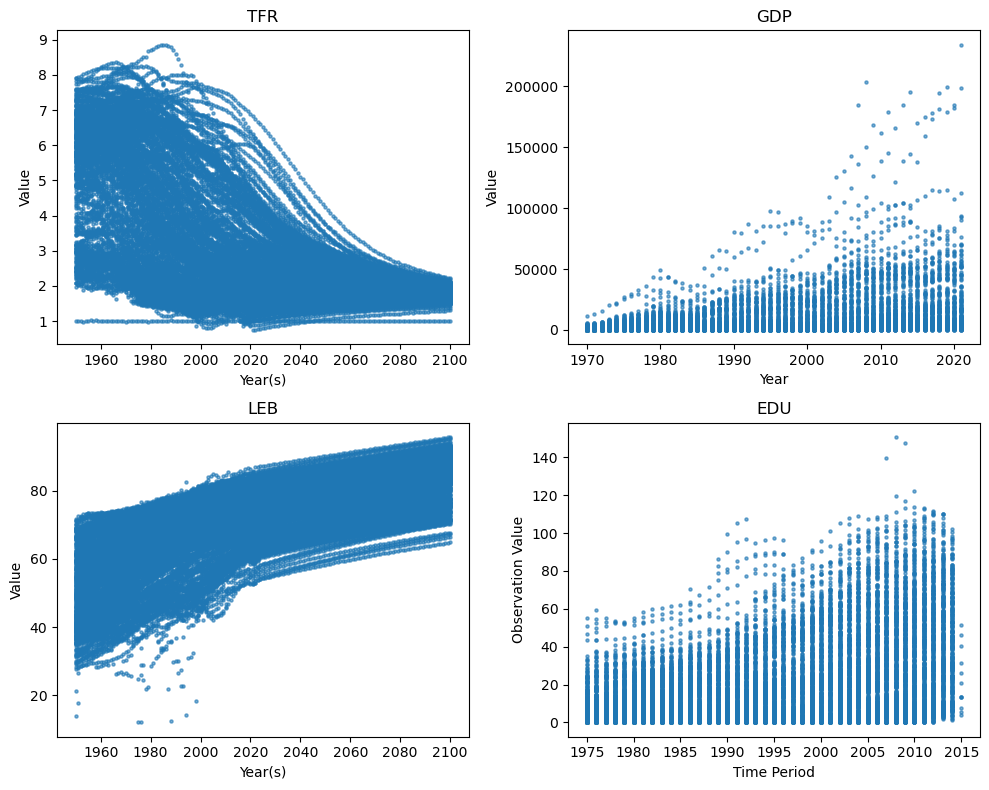

In [29]:
ax1 = plt.subplot(221)
TFR.plot(x='Year(s)', y='Value', kind='scatter', marker='.', fc='C0', alpha=0.5, ax=ax1)
ax1.set_title('TFR')

ax2 = plt.subplot(222)
GDP.plot(x='Year', y='Value', kind='scatter', marker='.', fc='C1', alpha=0.5, ax=ax2)
ax2.set_title('GDP')

ax3 = plt.subplot(223)
LEB.plot(x='Year(s)', y='Value', kind='scatter', marker='.', fc='C2', alpha=0.5, ax=ax3)
ax3.set_title('LEB')

ax4 = plt.subplot(224)
EDU.plot(x='Time Period', y='Observation Value', kind='scatter', marker='.', fc='C3', alpha=0.5, ax=ax4)
ax4.set_title('EDU')

plt.tight_layout()
plt.savefig('TFR_01.png', dpi=300)
plt.show()

## Visualización del TFR.

Las siguientes funciones son de utilidad para la visualización final.

In [15]:
from math import ceil

def maxmin(data, time, value, country):
    """
    Calcula el valor máximo y el mínimo de todos los países.
    
    Parameters
    ----------
    data : DataFrame
        Dataframe con la información de los países.
        
    time: str
        Nombre de la columna con la información de los años.
        
    value: str
        Nombre de la columna con la información de los datos.

    country: str
        Nombre de la columna con los nombres de los países.

    Returns
    -------
    p_max, y_max, p_min, y_min, yticks
    """    
    # Se obtiene el valor máximo del time
    x_max = data[time].max()
    x_min = data[time].min()
    
    # Se obtiene el valor máximo del value
    y_max = data[value].max() 

    # Extrae el nombre del país con el valor máximo
    p_max = data[data[value] == y_max].iloc[0][country]

    # Se obtiene el valor mínimo
    y_min = data[value].min() 

    # Extrae el nombre del país con el valor mínimo
    p_min = data[data[value] == y_min].iloc[0][country]

    return p_max, y_max, p_min, y_min, x_min, x_max

def set_canvas(data, time, value, country, figsize, xstep=10, ystep = 1):
    """
    Genera un lienzo para crear las gráficas sobre él.
    
    Parameters
    ----------
    data : DataFrame
        Dataframe con la información de los países.
        
    time: str
        Nombre de la columna con la información de los años.
        
    value: str
        Nombre de la columna con la información de los datos.

    country: str
        Nombre de la columna con los nombres de los países.
        
    figsize: tuple
        Tamaño de la figura.
        
    xstep, ystep: int
        Paso de los ticks en los ejes horizontal y vertical, respectivamente.

    Returns
    -------
    fig, ax: 
        Figura y ejes donde se hará la gráfica.
    """    
    p_max, y_max, p_min, y_min, x_min, x_max = maxmin(data, time, value, country)
    print('Máximo = {}, \t País : {}'.format(y_max, p_max))
    print('Mínimo = {}, \t País : {}'.format(y_min, p_min))
    
    # Se generan los yticks
    yticks = [i for i in range(0, ceil(y_max)+1, ystep)]

    fig = plt.figure(figsize=figsize)
    ax = plt.gca()
    
    if not data.empty:
        data.plot(x=time, y=value, color='lightgray', rot = 70, xlabel='', lw = 0.5, ax = ax, label='', legend=False)
        
    ax.spines.top.set_visible(False)
    ax.spines.bottom.set_visible(False)
    ax.spines.left.set_visible(False)
    ax.spines.right.set_visible(False)
    ax.set_ylim(y_min,y_max)
    ax.set_yticks(yticks)
    ax.set_xticks([a for a in range(x_min, x_max+1, xstep)])
    ax.grid(lw=0.5, color='gainsboro')

    return fig, ax

def plot_country(ax, country, time='Year(s)', value = 'Value', color='gray', label='', maxim = 2021, ): 
    """
    Dibuja la curva de un país.
    
    Parameters
    ----------
    ax : Axis
        Ejes donde se hará el gráfico.
        
    time: str
        Nombre de la columna con la información de los años.
        
    value: str
        Nombre de la columna con la información de los datos.

    country: str
        Nombre de la columna con los nombres de los países.
        
    color: str
        Color de la curva.
        
    label: str
        Etiqueta para la curva.
        
    maxim:
        Límite para graficar una línea continua, a partir de este
        límite se dibuja la línea punteada.
    """   
    x = country[time][country[time]>=maxim-1]
    y = country[value][country[time]>=maxim-1]
    ax.plot(x, y, c=color, ls = '--', lw = 0.75)

    x = country[time][country[time]<maxim]
    y = country[value][country[time]<maxim]
    ax.plot(x, y, c=color, ls = '-', lw = 2.0, label=label)
        

In [16]:
TFR_group.get_group('Yemen').dropna()

,Country or Area,Year(s),Variant,Value
43017,Yemen,2100,Medium,1.8205
43018,Yemen,2099,Medium,1.8224
43019,Yemen,2098,Medium,1.8230
43020,Yemen,2097,Medium,1.8345
43021,Yemen,2096,Medium,1.8387
...,...,...,...,...
43163,Yemen,1954,Medium,7.8979
43164,Yemen,1953,Medium,7.8988
43165,Yemen,1952,Medium,7.8836
43166,Yemen,1951,Medium,7.8959


Máximo = 8.8637, 	 País : Yemen
Mínimo = 0.7455, 	 País : China, Hong Kong SAR


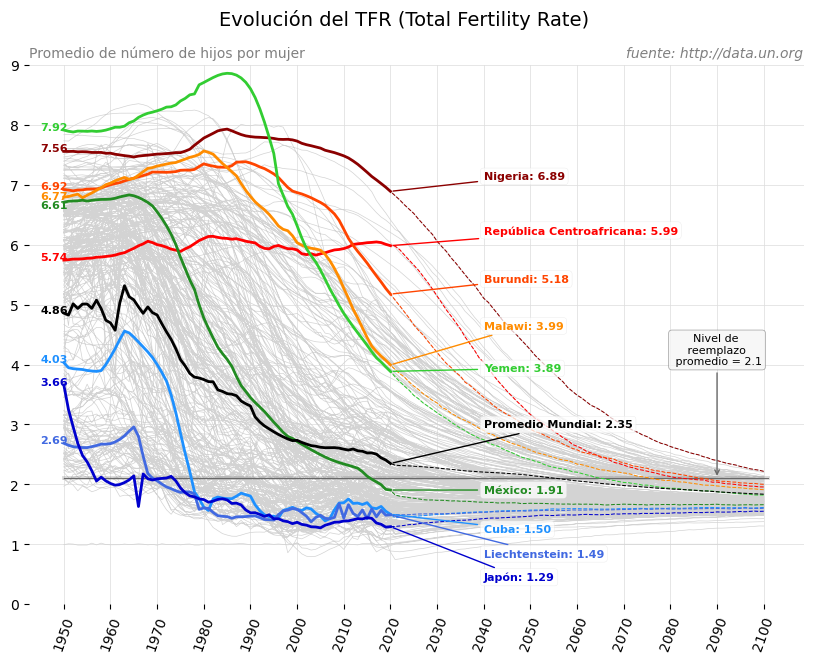

In [17]:
fig, ax = set_canvas(TFR, 'Year(s)', 'Value', 'Country or Area', (10,7))

ax.plot([years[-1], years[0]],[2.1,2.1], c='dimgray', ls = 'solid', lw=0.75)
ax.plot([years[-1], years[0]],[2.1,2.1], c='dimgray', ls = 'solid', alpha=0.25, lw=2.75) 

ax.set_title('Promedio de número de hijos por mujer', loc='left', color='gray', fontsize=10)
ax.set_title('fuente: http://data.un.org', loc='right', color='gray', fontstyle='italic', fontsize=10)
plt.suptitle('Evolución del TFR (Total Fertility Rate)', y = 0.96, color='black', fontsize=14)
ax.annotate('Nivel de \n reemplazo \n promedio = 2.1', 
             xy=(2090, 2.095), xytext=(2090, 4.0),
             bbox=dict(boxstyle='round', facecolor='whitesmoke', edgecolor='gray', alpha=0.75, linewidth=0.5),
             arrowprops=dict(arrowstyle='->', facecolor='dimgray', edgecolor='dimgray'),
             fontsize=8, color='black', horizontalalignment='center')

c_to_plot = [('Niger', 'Nigeria', 'darkred'), 
             ('Central African Republic', 'República Centroafricana', 'red'),
             ('Burundi', 'Burundi', 'orangered'),
             ('Malawi', 'Malawi', 'darkorange'),
             ('Yemen', 'Yemen', 'limegreen'), 
             ('Mexico', 'México', 'forestgreen'),
             ('Cuba', 'Cuba', 'dodgerblue'),
             ('Liechtenstein', 'Liechtenstein', 'royalblue'),
             ('Japan', 'Japón', 'mediumblue'),
             ('World', 'Promedio Mundial', 'black'),
#             ('Mongolia', 'Mongolia', 'darkorange'),
#             ('India','India','limegreen'),
#             ('United States of America', 'USA', 'deepskyblue'),
#             ('China', 'China', 'mediumblue'),
#             ('Spain','España','purple'),
#             ('Republic of Korea', 'Corea del sur', 'crimson'),
#             ('Holy See', 'Ciudad del Vaticano', 'olivedrab'),
            ]
for c in c_to_plot:
    c_tfr = TFR_group.get_group(c[0]).dropna()
    plot_country(ax, c_tfr, color=c[2])
    
    ytext = c_tfr['Value'][c_tfr['Year(s)'] == 2020].values[0]
    ytext_i = c_tfr['Value'][c_tfr['Year(s)'] == 1950].values[0]

    if c[0] == 'Mexico':
        ytext_i -= 0.1
    if c[0] == 'Malawi':
        ytext_i -= 0.03
        
    plt.text(1945, ytext_i, "{:.2f}".format(ytext_i), color = c[2], fontsize=8, fontweight='bold')

    xy_x = 2020
    xytext_x = 2040
    
    if c[0] == 'World':
        yoff = 0.6
    elif c[0] == 'Mongolia':
        yoff = 0.6
    elif c[0] == 'India':
        yoff = 0.4
    elif c[0] == 'United States of America':
        yoff = -0.2
    elif c[0] == 'Republic of Korea':
        yoff = -0.7
    elif c[0] == 'Mexico':
        yoff = -0.05
    elif c[0] == 'Malawi':
        yoff = 0.6
    elif c[0] == 'Yemen':
        yoff = 0.0
    elif c[0] == 'Japan':
        yoff = -0.9
    elif c[0] == 'Cuba':
        yoff = -0.3
    elif c[0] == 'Liechtenstein':
        yoff = -0.7
    elif c[0] == 'Holy See':
        xy_x = 1980
        xytext_x = 1965
        yoff = -0.5
    else:
        yoff = 0.2

    plt.annotate(c[1]+": {:.2f}".format(ytext), xy = (xy_x, ytext), xytext = (xytext_x, ytext+yoff), 
                     color = c[2], fontsize=8, fontweight='bold',
                     bbox=dict(boxstyle='round', fc='white', ec='gainsboro', alpha=0.75, linewidth=0.25),
                     arrowprops=dict(arrowstyle='-', color=c[2]))

plt.savefig('TFR.png', dpi=300)
plt.show()

## Exploración de los otros datos.

Máximo = 95.7552, 	 País : Monaco
Mínimo = 11.9951, 	 País : Cambodia


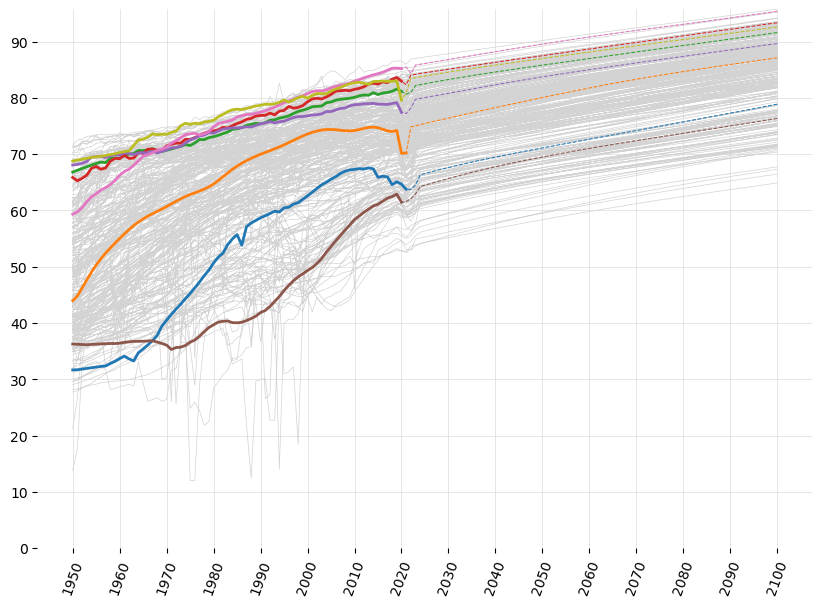

In [27]:
fig, ax = set_canvas(LEB, 'Year(s)', 'Value', 'Country or Area', (10,7), ystep=10)
plot_country(ax, LEB_group.get_group('Yemen').dropna(), color='C0', label='Yemen', maxim=2022)
plot_country(ax, LEB_group.get_group('Mexico').dropna(), color='C1', label='México', maxim=2022)
plot_country(ax, LEB_group.get_group('Germany').dropna(), color='C2', label='Alemania')
plot_country(ax, LEB_group.get_group('Holy See').dropna(), color='C3', label='El Baticano')
plot_country(ax, LEB_group.get_group('United States of America').dropna(), color='C4', label='USA')
plot_country(ax, LEB_group.get_group('Niger').dropna(), color='C5', label='Nigeria')
plot_country(ax, LEB_group.get_group('China, Hong Kong SAR').dropna(), color='C6', label='Hong Kong')
plot_country(ax, LEB_group.get_group('San Marino').dropna(), color='C8', label='San Marino')

In [19]:
maxmin(GDP, 'Year', 'Value', 'Country or Area')

('Monaco', 234317.084818276, 'Viet Nam', 34.1125600868106, 1970, 2021)

Máximo = 234317.084818276, 	 País : Monaco
Mínimo = 34.1125600868106, 	 País : Viet Nam


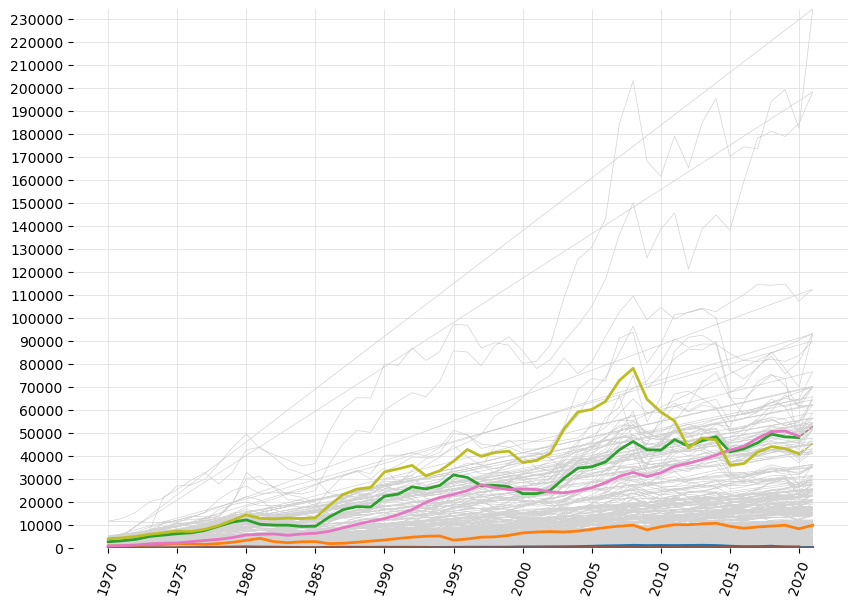

In [20]:
fig, ax = set_canvas(GDP, 'Year', 'Value', 'Country or Area', (10,7), xstep=5, ystep=10000)
plot_country(ax, GDP_group.get_group('Yemen').dropna(), time = 'Year', color='C0', label='Yemen', maxim=2022)
plot_country(ax, GDP_group.get_group('Mexico').dropna(), time = 'Year', color='C1', label='México', maxim=2022)
plot_country(ax, GDP_group.get_group('Germany').dropna(), time = 'Year', color='C2', label='Alemania')
#plot_country(ax, GDP_group.get_group('Holy See').dropna(), time = 'Year', color='C3', label='El Baticano')
#plot_country(ax, GDP_group.get_group('United States of America').dropna(), time = 'Year', color='C4', label='USA')
plot_country(ax, GDP_group.get_group('Niger').dropna(), time = 'Year', color='C5', label='Nigeria')
plot_country(ax, GDP_group.get_group('China, Hong Kong SAR').dropna(), time = 'Year', color='C6', label='Hong Kong')
plot_country(ax, GDP_group.get_group('San Marino').dropna(), time = 'Year', color='C8', label='San Marino')

In [21]:
maxmin(EDU, 'Time Period', 'Observation Value', 'Reference Area')

('Cuba', 150.70758, 'Anguilla', 0.0, 1975, 2015)

Máximo = 150.70758, 	 País : Cuba
Mínimo = 0.0, 	 País : Anguilla


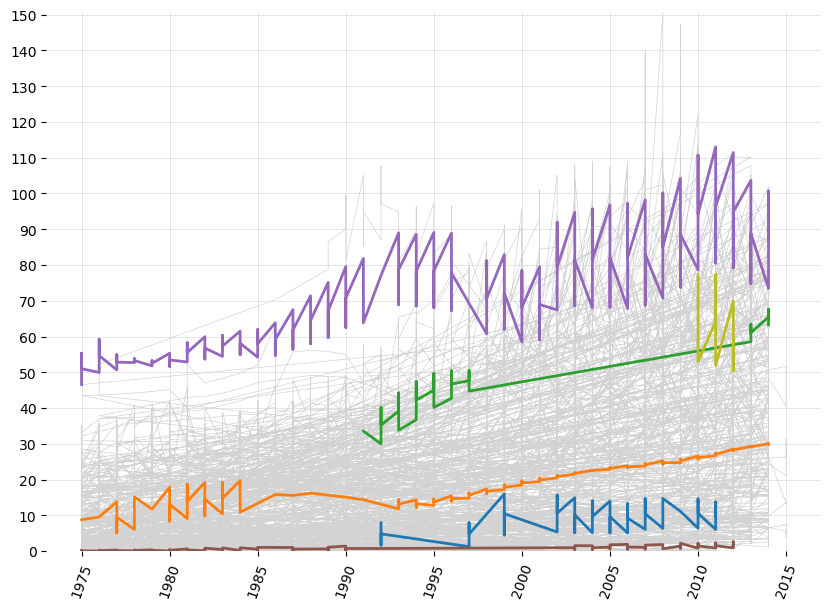

In [22]:
fig, ax = set_canvas(EDU, 'Time Period', 'Observation Value', 'Reference Area', (10,7), xstep=5, ystep=10)
plot_country(ax, EDU_group.get_group('Yemen').dropna(), time = 'Time Period', value = 'Observation Value', color='C0', label='Yemen', maxim=2022)
plot_country(ax, EDU_group.get_group('Mexico').dropna(), time = 'Time Period', value = 'Observation Value', color='C1', label='México', maxim=2022)
plot_country(ax, EDU_group.get_group('Germany').dropna(), time = 'Time Period', value = 'Observation Value', color='C2', label='Alemania')
#plot_country(ax, EDU_group.get_group('Holy See').dropna(), time = 'Time Period', value = 'Observation Value', color='C3', label='El Baticano')
plot_country(ax, EDU_group.get_group('United States of America').dropna(), time = 'Time Period', value = 'Observation Value', color='C4', label='USA')
plot_country(ax, EDU_group.get_group('Niger').dropna(), time = 'Time Period', value = 'Observation Value', color='C5', label='Nigeria')
#plot_country(ax, EDU_group.get_group('China, Hong Kong SAR').dropna(), time = 'Time Period', value = 'Observation Value', color='C6', label='Hong Kong')
plot_country(ax, EDU_group.get_group('San Marino').dropna(), time = 'Time Period', value = 'Observation Value', color='C8', label='San Marino')

Se realiza un regresión lineal de LEB vs TFR

In [23]:
import scipy
lres = scipy.stats.linregress(hdi.TFR, hdi.LEB)
x = np.linspace(1,9,100)
y = lres.slope * x + lres.intercept

plt.plot(x, y, label='Regresión lineal')
plt.legend()
plt.show()

NameError: name 'hdi' is not defined

Se grafica la relación de TFR vs LEB y el ajuste.

In [ ]:
lista_paises = [('Yemen', 'Yemen', 'C3'), 
             ('Niger', 'Nigeria', 'navy'), 
             ('Chad', 'Chad', 'C2'),
             ('Mexico', 'México', 'darkorange'),
             ('Japan', 'Japón', 'C7'),
             ('Sweden', 'Suecia', 'C5'),
             ('New Zealand', 'Nueva Zelanda', 'olivedrab')
               ]
paises_to_plot = [hdi[hdi['País'] == p[0]] for p in lista_paises]

plt.figure(figsize=(12,8))

ax = plt.subplot(111)
niv_edu = np.array(hdi['EDU']*10.0)
gdp_val = np.array(np.log(hdi['GDP']))
scatter = ax.scatter(hdi['TFR'], hdi['LEB'], marker='o', s=niv_edu, c=gdp_val, ec='silver', cmap='jet', alpha=0.75)

#    ax.scatter(p['TFR'], p['LEB'], c='k', marker='.', label=pc[1])

xt, yt = 4, 85
ic = 0
for pa, cl in zip(paises_to_plot, lista_paises):
    if cl[0] == 'Japan':
        xt, yt = 1.5, 87.5
    elif cl[0] == 'Niger':
        xt, yt = 8, 65.5
    elif cl[0] == 'Chad':
        xt, yt = 7, 45.5
    elif cl[0] == 'Yemen':
        xt, yt = 5.5, 70.5
    elif cl[0] == 'Mexico':
        xt, yt = 2.5, 62.5
    elif cl[0] == 'New Zealand':
        xt, yt = 5, 82.5
    elif cl[0] == 'Sweden':
        xt, yt = 2.5, 86


    niv_edu = np.array(pa['EDU']*10.0)
    gdp_val = np.array(np.log(pa['GDP']))
    ax.scatter(pa['TFR'], pa['LEB'], marker='o', s=niv_edu, c=gdp_val, ec='silver', cmap='jet', alpha=0.01, zorder=25)

    plt.annotate(cl[1], xy = (pa['TFR'], pa['LEB']), xytext = (xt, yt), 
                     color = 'dimgray', fontsize=14, fontweight='normal', ha='right',
                     bbox=dict(boxstyle='round', fc='white', ec='gainsboro', alpha=0.75, linewidth=0.25),
                     arrowprops=dict(arrowstyle='-', color='dimgray'))
    
ax.plot(x,y,'k--', alpha=0.5, lw=3)
ax.set_xlabel('TFR')
ax.set_ylabel('LEB')
ax.set_xticks([i for i in range(1,10)], labels=[i for i in range(1,10)], fontsize=14 )
ax.set_yticks([yt for yt in range(40,95,5)], labels=[yt for yt in range(40,95,5)], fontsize=14)
ax.spines['bottom'].set_visible(False)
ax.grid(lw=0.5)
plt.colorbar(mappable=scatter, label='GDP')

plt.tight_layout()

## Construcción del HDI

Se extrae información para el año 2010.

In [ ]:
countries = list(filter(filtra_EDU, list(filter(filtra_GDP, list(filter(filtra_LEB, TFR_countries))))))
tfr = pd.Series(dtype=float)
gdp = pd.Series(dtype=float)
edu = pd.Series(dtype=float)
leb = pd.Series(dtype=float)
final_countries = []
año = 2010

paises_to_remove = ['Malaysia', 'British Virgin Islands', 'Cook Islands', 'Monaco', 'Seychelles']
for p in paises_to_remove:
    countries.remove(p)

for i, c in enumerate(countries):

    c_g = EDU_group.get_group(c).groupby('Sex').get_group('Female')
    if año in c_g['Time Period'].values:
        final_countries.append(c)
        
        edu = pd.concat([edu, c_g[c_g['Time Period'] == año]['Observation Value']])
    
        c_g = GDP_group.get_group(c)
        gdp = pd.concat([gdp, c_g[c_g['Year'] == año]['Value']])
        
        c_g = TFR_group.get_group(c)
        tfr = pd.concat([tfr, c_g[c_g['Year(s)'] == año]['Value']])
        
        c_g = LEB_group.get_group(c)
        leb = pd.concat([leb, c_g[c_g['Year(s)'] == año]['Value']])

In [ ]:
print(len(tfr), len(gdp), len(edu), len(leb))

Se construye el dataframe con todas las variables para los países donde se tiene información. 

In [ ]:
hdi = pd.DataFrame()
hdi['País'] = final_countries
hdi['TFR'] = list(tfr)
hdi['GDP'] = list(gdp)
hdi['EDU'] = list(edu)
hdi['LEB'] = list(leb)
hdi

Se agrega una columna para el HDI.

In [ ]:
hdi['HDI'] = np.cbrt(hdi.TFR * hdi.EDU * hdi.LEB)

In [ ]:
hdi['HDI'] = hdi.HDI / hdi.HDI.max()

In [ ]:
hdi

Se realiza una regresión lineal del HDI vs TFR.

In [ ]:
lres = scipy.stats.linregress(hdi.TFR, hdi.HDI)
print(lres.slope, lres.intercept, lres.rvalue**2)
x = np.linspace(1,9,100)
y = lres.slope * x + lres.intercept

plt.plot(x, y, label='Regresión lineal')
plt.legend()
plt.show()

Se grafica todo juntos

In [ ]:
hdi.sort_values('EDU', inplace = True)

lista_paises = [('Niger', 'Nigeria', 'darkred'), 
             ('Central African Republic', 'República Centroafricana', 'red'),
             ('Burundi', 'Burundi', 'orangered'),
             ('Malawi', 'Malawi', 'darkorange'),
             ('Yemen', 'Yemen', 'limegreen'), 
             ('Mexico', 'México', 'forestgreen'),
             ('Cuba', 'Cuba', 'dodgerblue'),
             ('Liechtenstein', 'Liechtenstein', 'royalblue'),
             ('Japan', 'Japón', 'mediumblue')
               ]

paises_to_plot = [hdi[hdi['País'] == p[0]] for p in lista_paises]

plt.figure(figsize=(12,8))

ax = plt.subplot(111)
niv_edu = np.array(hdi['EDU']*10.0)
#gdp_val = np.array(np.log(hdi['GDP']))
gdp_val = np.array(hdi['GDP'])

scatter = ax.scatter(hdi['TFR'], hdi['HDI'], marker='o', s=niv_edu, c=gdp_val, ec='silver', cmap='YlGnBu', alpha=0.75)

ha = 'right'
for pa, cl in zip(paises_to_plot, lista_paises):
    if cl[0] == 'Yemen':
        xt, yt = 6., 0.55
    elif cl[0] == 'Niger':
        xt, yt = 8, 0.4
    elif cl[0] == 'India':
        xt, yt = 3.0, 0.2
    elif cl[0] == 'Yemen':
        xt, yt = 4.5, 1.0
    elif cl[0] == 'Mexico':
        xt, yt = 2.25, .25
    elif cl[0] == 'Liechtenstein':
        xt, yt = 0.75, 0.35
        ha = 'left'
    elif cl[0] == 'Burundi':
        xt, yt = 6.75, 0.45
    elif cl[0] == 'Central African Republic':
        xt, yt = 7, 0.1
    elif cl[0] == 'Malawi':
        xt, yt = 4, 0.1
    elif cl[0] == 'Republic of Korea':
        xt, yt = 0.65, 1.05
    elif cl[0] == 'Cuba':
        xt, yt = 3, 1.05
    else:
        xt, yt = 0.75, 1.0

    niv_edu = np.array(pa['EDU']*10.0)
    gdp_val = np.array(np.log(pa['GDP']))
    ax.scatter(pa['TFR'], pa['HDI'], marker='o', s = niv_edu, ec=cl[2], facecolor="None", alpha=0.1, zorder=15)

    plt.annotate(cl[1], xy = (pa['TFR'], pa['HDI']), xytext = (xt, yt), zorder=20,
                     color = cl[2], fontsize=10, fontweight='normal', ha=ha,
                     bbox=dict(boxstyle='round', fc='white', ec='gainsboro', alpha=0.75, linewidth=0.25),
                     arrowprops=dict(arrowstyle='->', color=cl[2]))
    
ax.plot(x,y,'k--', alpha=0.5, lw=3, label='Ajuste: slope = {:0.3f}, intercept = {:0.3f}, PCC = {:0.3f}'.format(lres.slope, lres.intercept, lres.rvalue))
ax.set_xlabel('TFR')
ax.set_ylabel('HDI')
ax.set_xticks([i for i in range(1,10)], labels=[i for i in range(1,10)], fontsize=14 )
ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0], labels=[0,0.2,0.4,0.6,0.8,1.0], fontsize=14)
ax.set_ylim(-0.1, 1.1)
ax.spines['bottom'].set_visible(False)
ax.grid(lw=0.5)
ax.set_title('Efecto del TFR, GDP y EDU en el HDI', loc='left', color='gray', fontsize=10)
ax.set_title('fuente: http://data.un.org', loc='right', color='gray', fontstyle='italic', fontsize=10)
plt.suptitle('Índice de desarrollo humano (HDI) en 2010', y = 0.96, color='black', fontsize=14)
texto = """ 
Cada círculo representa a un país. El nivel de
educación (EDU) en las mujeres se representa 
como el tamaño de cada círculo.
"""
plt.text(5.5,0.9,texto, fontsize=10,bbox=dict(boxstyle='round', fc='white', ec='silver', alpha=0.5, linewidth=0.75))
plt.colorbar(mappable=scatter, label='GDP [USD $]', ticks=[1000, 20000, 40000, 60000, 80000, 100000, 120000, 135000])
plt.legend(loc='lower left', frameon=True)

plt.savefig('HDI.pdf', dpi = 300)